In [4]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Read File and store into Pandas data frame
austin_data = pd.read_csv("Crime_Data/Austin_Crime_Data.csv")
austin_data.head()

,Date,Latitude,Longitude
0,9/14/17,30.333542,-97.705762
1,10/11/14,30.268006,-97.738955
2,2/11/15,30.261677,-97.718775
3,10/1/18,30.398291,-97.744022
4,11/23/03,30.264357,-97.736801


In [8]:
austin_data["Date"] = austin_data["Date"].astype('datetime64')

In [9]:
austin_data.head()

,Date,Latitude,Longitude
0,2017-09-14,30.333542,-97.705762
1,2014-10-11,30.268006,-97.738955
2,2015-02-11,30.261677,-97.718775
3,2018-10-01,30.398291,-97.744022
4,2003-11-23,30.264357,-97.736801


In [10]:
austin_data.dtypes

Date         datetime64[ns]
Latitude            float64
Longitude           float64
dtype: object

In [89]:
austin_sorted = austin_data.sort_values(by=["Date"])
austin_sorted = austin_sorted.reset_index(drop=True)
austin_sorted.head()

,Date,Latitude,Longitude
0,2003-01-01,30.372128,-97.700873
1,2003-01-01,30.233763,-97.722239
2,2003-01-01,NaN,NaN
3,2003-01-01,30.229574,-97.774432
4,2003-01-01,30.229435,-97.722033


In [90]:
austin_2018a = austin_sorted.loc[austin_sorted["Date"] >= "2018-01-01", :]
austin_2018a.head()

,Date,Latitude,Longitude
980084,2018-01-01,30.407848,-97.678228
980085,2018-01-01,30.269227,-97.752997
980086,2018-01-01,30.260003,-97.739408
980087,2018-01-01,30.266252,-97.749883
980088,2018-01-01,30.292445,-97.696473


In [91]:
austin_2018 = austin_2018a.loc[austin_2018a["Date"] <= "2018-12-31", :]
austin_2018.head()

,Date,Latitude,Longitude
980084,2018-01-01,30.407848,-97.678228
980085,2018-01-01,30.269227,-97.752997
980086,2018-01-01,30.260003,-97.739408
980087,2018-01-01,30.266252,-97.749883
980088,2018-01-01,30.292445,-97.696473


In [92]:
austin_2018 = austin_2018.reset_index(drop=True)

In [62]:
len(austin_2018)

48442

In [50]:
austin_2018_w = len(austin_2018.loc[((austin_2018["Date"] >= "2018-01-01") &
                               (austin_2018["Date"] <= "2018-03-20")) |
                               (austin_2018["Date"] >= "2018-12-21")])

austin_2018_s = len(austin_2018.loc[((austin_2018["Date"] >= "2018-03-21") &
                               (austin_2018["Date"] <= "2018-06-20"))])
                    
austin_2018_ss = len(austin_2018.loc[((austin_2018["Date"] >= "2018-06-20") &
                               (austin_2018["Date"] <= "2018-09-21"))])

austin_2018_f = len(austin_2018.loc[((austin_2018["Date"] >= "2018-09-22") &
                               (austin_2018["Date"] <= "2018-12-20"))])

In [51]:
print(f"Winter: {austin_2018_w}")
print(f"Spring: {austin_2018_s}")
print(f"Summer: {austin_2018_ss}")
print(f"Fall: {austin_2018_f}")

Winter: 10798
Spring: 10109
Summer: 9324
Fall: 18307


In [52]:
# DATASET 3
seasons = ["Winter", "Spring", "Summer", "Fall"]
crime = [austin_2018_w, austin_2018_s, austin_2018_ss, austin_2018_f]
colors = ["lightgreen", "red", "yellow", "lightskyblue"]
explode = (0, 0, 0, .05)

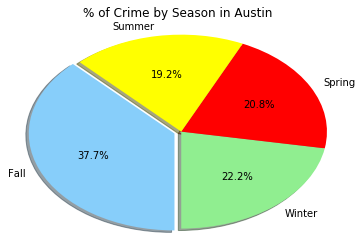

In [53]:
plt.title("% of Crime by Season in Austin")
plt.pie(crime, explode=explode, labels=seasons, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("auto")
plt.show()

In [93]:
austin_2018.head()

,Date,Latitude,Longitude
0,2018-01-01,30.407848,-97.678228
1,2018-01-01,30.269227,-97.752997
2,2018-01-01,30.260003,-97.739408
3,2018-01-01,30.266252,-97.749883
4,2018-01-01,30.292445,-97.696473


In [95]:
attempt = austin_2018.groupby(austin_2018["Date"].dt.dayofyear)

In [113]:
attempt.head()

,Date,Latitude,Longitude
0,2018-01-01,30.407848,-97.678228
1,2018-01-01,30.269227,-97.752997
2,2018-01-01,30.260003,-97.739408
3,2018-01-01,30.266252,-97.749883
4,2018-01-01,30.292445,-97.696473
121,2018-01-02,30.307651,-97.735350
122,2018-01-02,30.216829,-97.796978
123,2018-01-02,30.318529,-97.703422
124,2018-01-02,30.366117,-97.727721
125,2018-01-02,30.269733,-97.736929


In [98]:
attempt["Date"].count()

Date
1      121
2       81
3       88
4      100
5      106
6      100
7      105
8       91
9      102
10      94
11      91
12      96
13      91
14      79
15      99
16      76
17      93
18      90
19     116
20     104
21     104
22      92
23      95
24      90
25     113
26     128
27      94
28     103
29      89
30      88
      ... 
336    293
337    282
338    267
339    280
340    270
341    292
342    280
343    265
344    269
345    287
346    292
347    261
348    294
349    284
350    281
351    284
352    292
353    276
354    263
355    311
356    277
357    210
358    223
359    228
360    207
361    261
362    271
363    224
364    211
365    260
Name: Date, Length: 365, dtype: int64

In [103]:
year_series = pd.Series(range(0,366))

In [108]:
austin_plot_data = pd.DataFrame({"Day of the Year" : year_series, "Crime Count" : attempt["Date"].count()})
austin_plot_data.head()

,Day of the Year,Crime Count
0,0,NaN
1,1,121.0
2,2,81.0
3,3,88.0
4,4,100.0


In [111]:
austin_fixed = austin_plot_data.dropna(how='any')
austin_fixed.head()

,Day of the Year,Crime Count
1,1,121.0
2,2,81.0
3,3,88.0
4,4,100.0
5,5,106.0


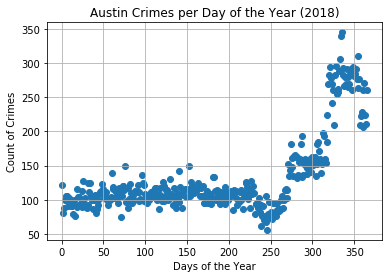

In [112]:
# Build a scatter plot for each data type
plt.scatter(austin_fixed["Day of the Year"], austin_fixed["Crime Count"], marker="o")

# Incorporate the other graph properties
plt.title("Austin Crimes per Day of the Year (2018)")
plt.ylabel("Count of Crimes")
plt.xlabel("Days of the Year")
plt.grid(True)

# Save the figure
#plt.savefig("MAKEAFOLDER/NAMETHEGRAPHSOMETHING.png")

# Show plot
plt.show()

In [117]:
weather = pd.read_csv("Weather_Data/Weather.csv")
weather.head()

,City,Month,High_avg,Low_avg
0,Chicago,January,32,21
1,Chicago,February,36,26
2,Chicago,March,45,34
3,Chicago,April,56,43
4,Chicago,May,66,53


In [118]:
austin_weather = weather.loc[weather["City"] == "Austin", :]
austin_weather.head()

,City,Month,High_avg,Low_avg
24,Austin,January,61,40
25,Austin,February,65,44
26,Austin,March,73,51
27,Austin,April,80,58
28,Austin,May,86,66


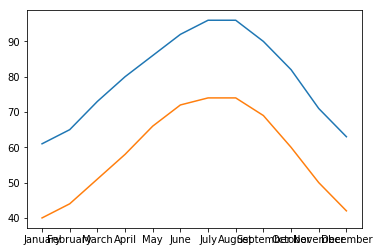

In [119]:
# Plot both on the same chart
plt.plot(austin_weather["Month"], austin_weather["High_avg"])
plt.plot(austin_weather["Month"], austin_weather["Low_avg"])

plt.show()